<a href="https://colab.research.google.com/github/AyushSrivastava27/BitPredict/blob/main/BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-cadf5967-87fa-d49d-2968-5b1597c8ae41)


In [11]:
!wget https://raw.githubusercontent.com/AyushSrivastava27/BitPredict/main/BTC_USD.csv

--2024-03-04 19:19:35--  https://raw.githubusercontent.com/AyushSrivastava27/BitPredict/main/BTC_USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD.csv’

BTC_USD.csv         100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-03-04 19:19:35 (7.28 MB/s) - ‘BTC_USD.csv’ saved [178509/178509]



In [12]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [14]:
len(df)

2787

In [17]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


from matplotlib import pyplot as plt
_df_0['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

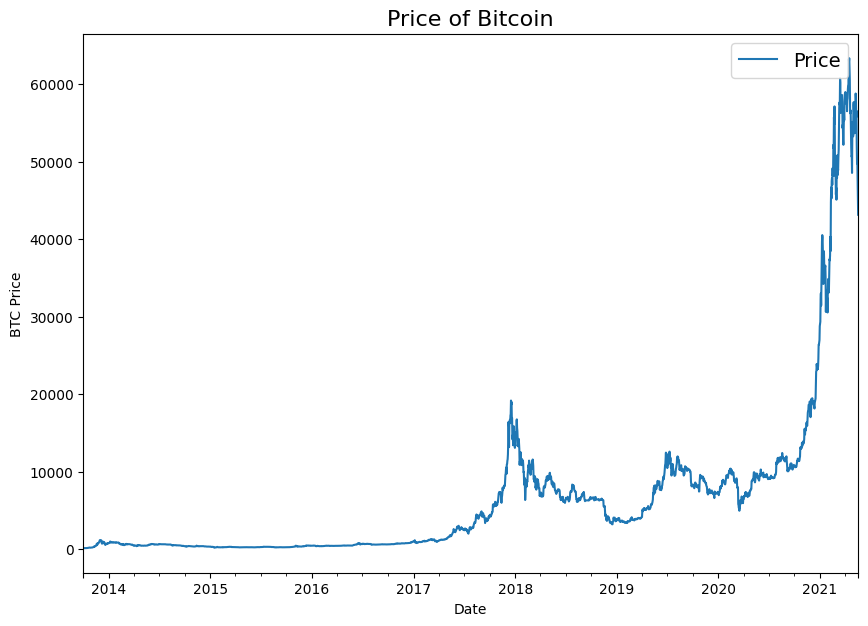

In [18]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize= (10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin", fontsize = 16)
plt.legend(fontsize = 14);

In [19]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

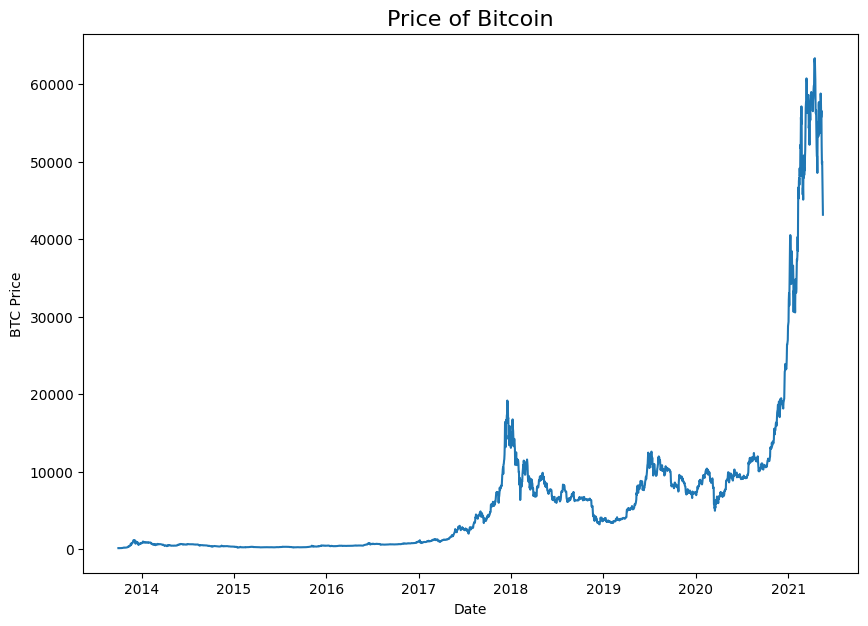

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize= (10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin", fontsize = 16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

### Creating Train and Test sets for Time Series Data